# Triple Exponential Model

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [2]:
data=pd.read_csv(r"D:\Mahesh\IMARTICUS\Machine Learning with python\Time Series Analysis\Exponential Smoothing\practice\diabetic.csv")
data.head(3)

,date,sales
0,1991-07-01,3.526591
1,1991-08-01,3.180891
2,1991-09-01,3.252221


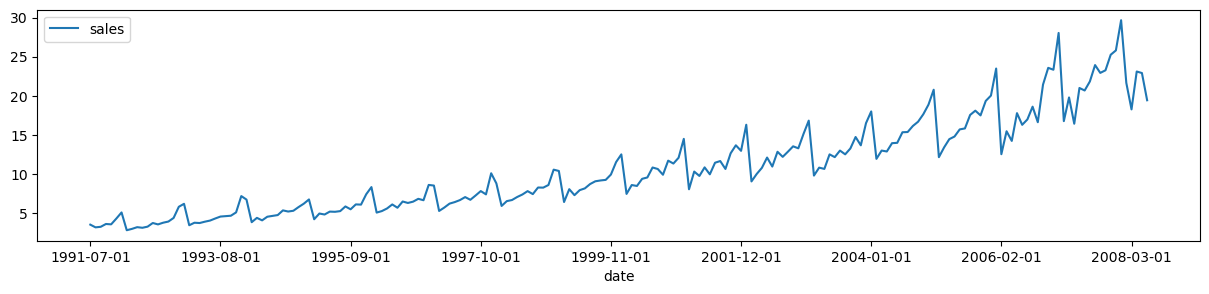

In [4]:
data.plot.line(x = 'date',y = 'sales',figsize=(15,3))
plt.show()  # Trend , Seasonal

In [5]:
data2=data.set_index("date")
data2.head()

,sales
date,
1991-07-01,3.526591
1991-08-01,3.180891
1991-09-01,3.252221
1991-10-01,3.611003
1991-11-01,3.565869


#### Auto Model

In [6]:
model2 = ExponentialSmoothing(data2,trend='add',seasonal='mul',seasonal_periods=12).fit()
model2.params

C:\Users\mahes\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


{'smoothing_level': 0.20338586284824456,
 'smoothing_trend': 0.041926380989411545,
 'smoothing_seasonal': 2.555942586192297e-16,
 'damping_trend': nan,
 'initial_level': 1.3973150375132366,
 'initial_trend': 0.030818887444465818,
 'initial_seasons': array([2.2028252 , 2.27517562, 2.2286214 , 2.37384641, 2.48046236,
        2.63870531, 2.9709852 , 1.8062163 , 1.92654508, 1.94428499,
        2.13820668, 2.01358331]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [7]:
model2.fittedvalues

date
1991-07-01     3.145929
1991-08-01     3.402691
1991-09-01     3.358992
1991-10-01     3.628460
1991-11-01     3.864583
                ...    
2008-02-01    18.645619
2008-03-01    20.735685
2008-04-01    20.595239
2008-05-01    23.428204
2008-06-01    22.164011
Length: 204, dtype: float64

In [8]:
df = pd.DataFrame(
    np.c_[data.sales, model2.level, model2.trend, model2.season,model2.fittedvalues],
    columns=["Actual","Level","Trend","Seasonal","Forecast"])
df

,Actual,Level,Trend,Seasonal,Forecast
0,3.526591,1.463280,0.032292,2.202825,3.145929
1,3.180891,1.475745,0.031461,2.275176,3.402691
2,3.252221,1.497462,0.031053,2.228621,3.358992
3,3.611003,1.527019,0.030990,2.373846,3.628460
4,3.565869,1.533516,0.029963,2.480462,3.864583
...,...,...,...,...,...
199,21.654285,10.661812,0.101333,1.806216,18.645619
200,18.264945,10.502309,0.090397,1.926545,20.735685
201,23.107677,10.855525,0.101416,1.944285,20.595239
202,22.912510,10.907888,0.099360,2.138207,23.428204


### Future Forecast 

In [9]:
Forecast2 = model2.forecast(36)
Forecast2

2008-07-01    23.832495
2008-08-01    24.814994
2008-09-01    24.502882
2008-10-01    26.307976
2008-11-01    27.707296
2008-12-01    29.706553
2009-01-01    33.708181
2009-02-01    20.651521
2009-03-01    22.196439
2009-04-01    22.571514
2009-05-01    25.010493
2009-06-01    23.729550
2009-07-01    26.153099
2009-08-01    27.211817
2009-09-01    26.850662
2009-10-01    28.808746
2009-11-01    30.320383
2009-12-01    32.486343
2010-01-01    36.838017
2010-02-01    22.554311
2010-03-01    24.225991
2010-04-01    24.619755
2010-05-01    27.263023
2010-06-01    25.850794
2010-07-01    28.473704
2010-08-01    29.608640
2010-09-01    29.198442
2010-10-01    31.309515
2010-11-01    32.933469
2010-12-01    35.266133
2011-01-01    39.967853
2011-02-01    24.457101
2011-03-01    26.255544
2011-04-01    26.667995
2011-05-01    29.515554
2011-06-01    27.972038
Freq: MS, dtype: float64

#### Forecast Plot

ConversionError: Failed to convert value(s) to axis units: array([Period('2008-07', 'M'), Period('2008-08', 'M'),
       Period('2008-09', 'M'), Period('2008-10', 'M'),
       Period('2008-11', 'M'), Period('2008-12', 'M'),
       Period('2009-01', 'M'), Period('2009-02', 'M'),
       Period('2009-03', 'M'), Period('2009-04', 'M'),
       Period('2009-05', 'M'), Period('2009-06', 'M'),
       Period('2009-07', 'M'), Period('2009-08', 'M'),
       Period('2009-09', 'M'), Period('2009-10', 'M'),
       Period('2009-11', 'M'), Period('2009-12', 'M'),
       Period('2010-01', 'M'), Period('2010-02', 'M'),
       Period('2010-03', 'M'), Period('2010-04', 'M'),
       Period('2010-05', 'M'), Period('2010-06', 'M'),
       Period('2010-07', 'M'), Period('2010-08', 'M'),
       Period('2010-09', 'M'), Period('2010-10', 'M'),
       Period('2010-11', 'M'), Period('2010-12', 'M'),
       Period('2011-01', 'M'), Period('2011-02', 'M'),
       Period('2011-03', 'M'), Period('2011-04', 'M'),
       Period('2011-05', 'M'), Period('2011-06', 'M')], dtype=object)

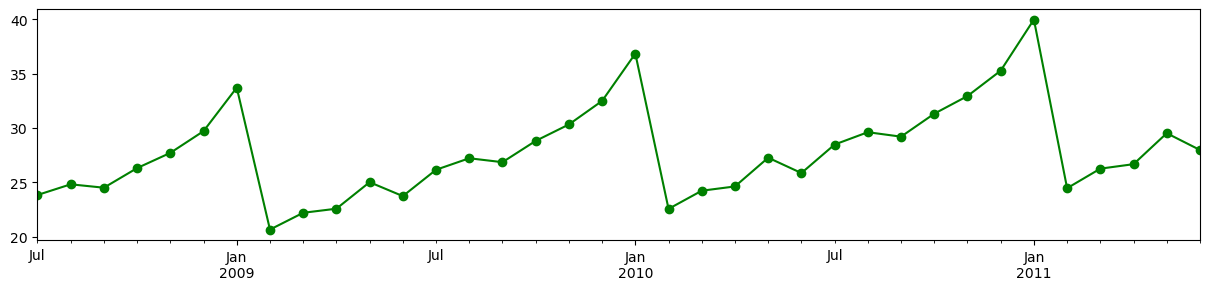

In [10]:
# plot
Forecast2.plot(marker='o', color='green')
model2.fittedvalues.plot(marker='o',  color='blue',figsize=(15,3))

In [11]:
data2["Forecast"]=model2.fittedvalues
data2.head()

,sales,Forecast
date,,
1991-07-01,3.526591,3.145929
1991-08-01,3.180891,3.402691
1991-09-01,3.252221,3.358992
1991-10-01,3.611003,3.628460
1991-11-01,3.565869,3.864583


#### Accuracy of Model

In [13]:
mean_absolute_percentage_error = np.mean(np.abs(data2.sales - data2.Forecast)/np.abs(data2.sales))*100
mean_absolute_percentage_error

4.779025374897601

# Finished 